<a href="https://colab.research.google.com/github/ninjab3381/CNN_Robotic_Inference/blob/master/cnn_vgg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
  # The %tensorflow_version magic only works in colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
import keras

TensorFlow 2.x selected.


Using TensorFlow backend.


In [2]:
print(tf.__version__)
print(keras.__version__)

2.1.0
2.2.5


In [3]:
IMAGE_SIZE = 224
BATCH_SIZE = 30

datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.1)

train_generator = datagen.flow_from_directory(
    'drive/My Drive/Synopsys/pics/',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='training')

val_generator = datagen.flow_from_directory(
    'drive/My Drive/Synopsys/pics/',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='validation')

Found 396 images belonging to 11 classes.
Found 44 images belonging to 11 classes.


In [4]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((30, 224, 224, 3), (30, 11))

In [0]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

from tensorflow.keras.applications import(
    vgg16, 
    inception_v3, 
    resnet50, 
    mobilenet, 
    MobileNetV2
)
import numpy as np

# Create the base model from the pre-trained model MobileNet V2
base_model = vgg16.VGG16(input_shape=IMG_SHAPE,
                   include_top=False, 
                   weights='imagenet')

In [0]:
base_model.trainable = False

In [0]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential

model = Sequential([
  base_model,
])
model.add(Conv2D(32, 3, activation='relu'))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())
model.add(Dense(11, activation='softmax'))

In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
conv2d (Conv2D)              (None, 5, 5, 32)          147488    
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 32)          0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 11)                363       
Total params: 14,862,539
Trainable params: 147,851
Non-trainable params: 14,714,688
_________________________________________________________________


In [10]:
print('Number of trainable variables = {}'.format(len(model.trainable_variables)))

Number of trainable variables = 4


In [11]:
epochs = 200

history = model.fit_generator(train_generator, 
                    epochs=epochs, 
                    validation_data=val_generator)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 14 steps, validate for 2 steps
Epoch 1/200
14/14 [==============================] - 13s 954ms/step - loss: 2.0120 - accuracy: 0.3561 - val_loss: 1.4826 - val_accuracy: 0.5455
Epoch 2/200
14/14 [==============================] - 10s 713ms/step - loss: 1.0450 - accuracy: 0.7475 - val_loss: 0.9789 - val_accuracy: 0.8182
Epoch 3/200
14/14 [==============================] - 10s 726ms/step - loss: 0.6571 - accuracy: 0.8662 - val_loss: 0.7268 - val_accuracy: 0.8409
Epoch 4/200
14/14 [==============================] - 10s 725ms/step - loss: 0.4465 - accuracy: 0.9419 - val_loss: 0.5001 - val_accuracy: 0.9318
Epoch 5/200
14/14 [==============================] - 10s 717ms/step - loss: 0.3190 - accuracy: 0.9646 - val_loss: 0.3651 - val_accuracy: 0.9091
Epoch 6/200
14/14 [==============================] - 10s 724ms/step - loss: 0.2320 - accuracy: 0.9823 - val_loss:

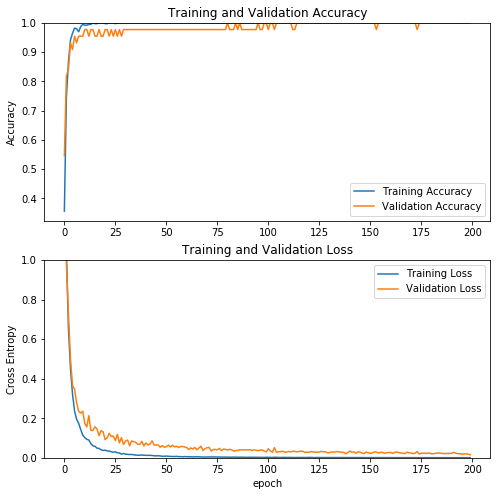

In [12]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [0]:
base_model.trainable = True

In [14]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  19


In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(1e-5),
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
conv2d (Conv2D)              (None, 5, 5, 32)          147488    
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 32)          0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 11)                363       
Total params: 14,862,539
Trainable params: 147,851
Non-trainable params: 14,714,688
_________________________________________________________________


In [17]:
history_fine = model.fit_generator(train_generator, 
                                   epochs=200,
                                   validation_data=val_generator)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 14 steps, validate for 2 steps
Epoch 1/200
14/14 [==============================] - 11s 756ms/step - loss: 4.6007e-04 - accuracy: 1.0000 - val_loss: 0.0162 - val_accuracy: 1.0000
Epoch 2/200
14/14 [==============================] - 10s 740ms/step - loss: 5.7523e-04 - accuracy: 1.0000 - val_loss: 0.0172 - val_accuracy: 1.0000
Epoch 3/200
14/14 [==============================] - 10s 716ms/step - loss: 4.7655e-04 - accuracy: 1.0000 - val_loss: 0.0185 - val_accuracy: 1.0000
Epoch 4/200
14/14 [==============================] - 10s 715ms/step - loss: 4.3896e-04 - accuracy: 1.0000 - val_loss: 0.0192 - val_accuracy: 1.0000
Epoch 5/200
14/14 [==============================] - 10s 720ms/step - loss: 4.9828e-04 - accuracy: 1.0000 - val_loss: 0.0195 - val_accuracy: 1.0000
Epoch 6/200
14/14 [==============================] - 10s 720ms/step - loss: 4.7791e-04 - accuracy: 1.0000 - val_loss: 0.0195 - val_accuracy: 1.0000
Epoch 7/200
14/14 [==

In [0]:
loc = 'drive/My Drive/Synopsys/pics/alfoil/alfoil_10.png'
loc = 'drive/My Drive/Synopsys/pics/milkcan/milkcan_10.png'
# loc = 'drive/My Drive/Synopsys/pics/spoon/spoon_10.png'
loc = 'drive/My Drive/Synopsys/pics/glassbottle/glassbottle_10.png'

In [19]:
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python

import urllib.request
import cv2
import numpy as np

# image loader
def get_image(loc, resize=400):
  """
  downloads an image from url, converts to numpy array,
  resizes, and returns it
  """
  img = cv2.imread(loc)
  # img = cv2.imdecode(img, cv2.IMREAD_COLOR)
  img = cv2.resize(img, (400, 400), interpolation=cv2.INTER_CUBIC)


  # cropped = img[50:274, 50:274] - spoon
  cropped = img[100:324, 100:324]

  return cropped

     |████████████████████████████████| 28.2MB 110kB/s 
ERROR: tensor2tensor 1.14.1 has requirement tensorflow-probability==0.7.0, but you'll have tensorflow-probability 0.9.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


PIL image size 150528


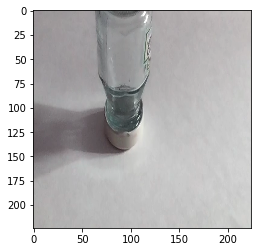

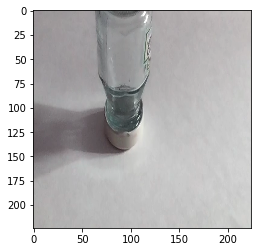

numpy array size (224, 224, 3)
image batch size (1, 224, 224, 3)


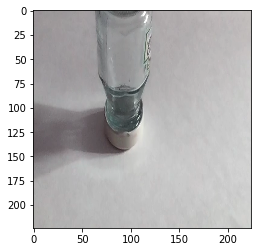

In [20]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
%matplotlib inline
 
original = get_image(loc, 224)
print('PIL image size',original.size)
plt.imshow(original)
plt.show()
 
# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)a
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
plt.show()
print('numpy array size',numpy_image.shape)
 
# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

0 0.0
1 0.0
2 3.895703e-31
3 1.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0


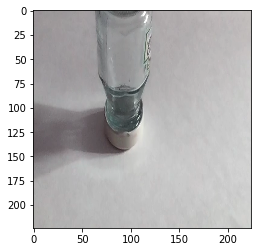

In [21]:
# prepare the image for the inception_v3 model
processed_image = vgg16.preprocess_input(image_batch.copy())
 
# get the predicted probabilities for each class
predictions = model.predict(image_batch.copy())
# print predictions
 
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
plt.imshow(original)
for i, prediction in enumerate(predictions[0]):
  print(i, prediction)

In [22]:
print (train_generator.class_indices)
print (list(train_generator.class_indices))

{'alfoil': 0, 'box': 1, 'cbcontainer': 2, 'cokecan': 3, 'glassbottle': 4, 'm_and_m': 5, 'milkcan': 6, 'plasticbottle': 7, 'spoon': 8, 'steelspoon': 9, 'straw': 10}
['alfoil', 'box', 'cbcontainer', 'cokecan', 'glassbottle', 'm_and_m', 'milkcan', 'plasticbottle', 'spoon', 'steelspoon', 'straw']


In [23]:
lst = list(zip(predictions[0], list(train_generator.class_indices)))
print(lst)

[(0.0, 'alfoil'), (0.0, 'box'), (3.895703e-31, 'cbcontainer'), (1.0, 'cokecan'), (0.0, 'glassbottle'), (0.0, 'm_and_m'), (0.0, 'milkcan'), (0.0, 'plasticbottle'), (0.0, 'spoon'), (0.0, 'steelspoon'), (0.0, 'straw')]


In [24]:
from operator import itemgetter
print(max(lst, key = itemgetter(0))) 

(1.0, 'cokecan')


In [25]:
path = F"/content/drive/My Drive/Models/VGG16/ninja_cnn_vgg16"
model.save(path)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /content/drive/My Drive/Models/VGG16/ninja_cnn_vgg16/assets


In [26]:
model.input_shape

(None, 224, 224, 3)